**1. El límite de difracción en un telescopio**

Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción está dada por:
$$
I(r)=\left(\frac{J_1(k r)}{k r}\right)^2
$$
donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k=$ $2 \pi / \lambda$ y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están dadas por:
$$
J_m(x)=\frac{1}{\pi} \int_0^\pi \cos (m \theta-x \sin \theta) \mathrm{d} \theta
$$
donde $m$ es un entero no negativo y $x \geq 0$.
(a) Escribe una función $J(m, x)$ que calcule el valor de $\ln (x)$ usando la regla de Simpson con $N=1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una función de $x$ (de $x=0$ a $x=20$ ).



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.special import jn
from scipy.integrate import trapz
from matplotlib.colors import LogNorm
from scipy.special import legendre
from scipy.integrate import fixed_quad
from scipy.integrate import quad

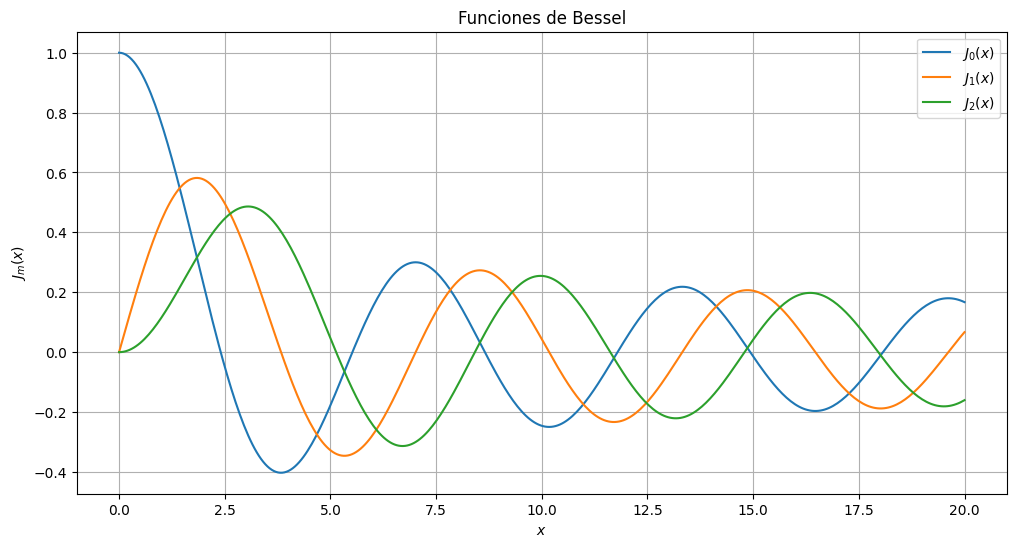

In [ ]:
def J(m, x):
    def integrand(theta):
        return np.cos(m * theta - x * np.sin(theta)) #funcion

    N = 1000
    a = 0
    b = np.pi
    h = (b - a) / N
    integral = integrand(a) + integrand(b) #definiendo de donde a donde integrar

    for i in range(1, N, 2):
        integral += 4 * integrand(a + i * h)
    for i in range(2, N-1, 2):
        integral += 2 * integrand(a + i * h)

    return (1/np.pi) * (h/3) * integral

valorx = np.linspace(0, 20, 400)
j0 = []
j1 = []
j2 = []

for x in valorx:
  j0.append(J(0,x))#
  j1.append(J(1,x))#para que se agreguen los valores de las j's en las listas que creamos anteriormente
  j2.append(J(2,x))#

plt.figure(figsize=(12,6))
plt.plot(valorx, j0, label='$J_0(x)$')
plt.plot(valorx, j1, label='$J_1(x)$')
plt.plot(valorx, j2, label='$J_2(x)$')
plt.title('Funciones de Bessel')
plt.xlabel('$x$')
plt.ylabel('$J_m(x)$')
plt.legend()
plt.grid(True)
plt.show()

**b)** Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

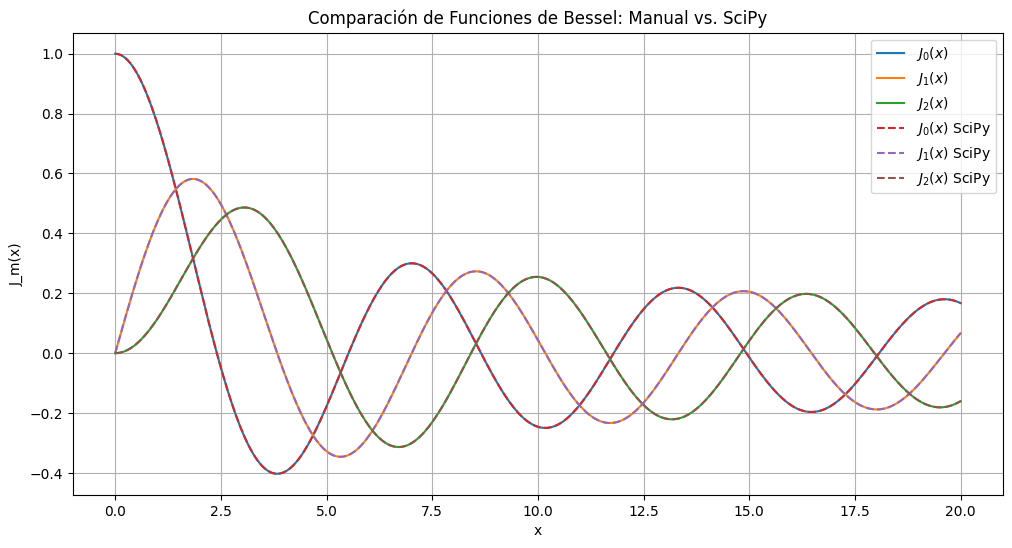

In [ ]:
def J(m, x):
    def integrand(theta):
        return np.cos(m * theta - x * np.sin(theta))

    N = 1000
    valor_theta = np.linspace(0, np.pi, N)
    valory = integrand(valor_theta)
    integral = simps(valory, valor_theta)

    return (1/np.pi) * integral


j0_scipy = jn(0, valorx)
j1_scipy = jn(1, valorx)
j2_scipy = jn(2, valorx)

plt.figure(figsize=(12,6))



#valores con scipy
plt.plot(valorx, j0, label='$J_0(x)$')
plt.plot(valorx, j1, label='$J_1(x)$')
plt.plot(valorx, j2, label='$J_2(x)$')

#valores sin scipy
plt.plot(valorx, j0_scipy, '--', label='$J_0(x)$ SciPy')
plt.plot(valorx, j1_scipy, '--', label='$J_1(x)$ SciPy')
plt.plot(valorx, j2_scipy, '--', label='$J_2(x)$ SciPy')


plt.title('Comparación de Funciones de Bessel: Manual vs. SciPy')
plt.xlabel('x')
plt.ylabel('J_m(x)')
plt.legend()
plt.grid(True)
plt.show()


**c)** Escribe un segundo programa que haga una gráfica de densidad de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda = 500 nm$, en una región cuadrada de plano focal, usando la fórmula dada anteriormente. Su imagen debe de cubrir valores de $r$ desde cero hasta aproximadamente $1 \mu m$.

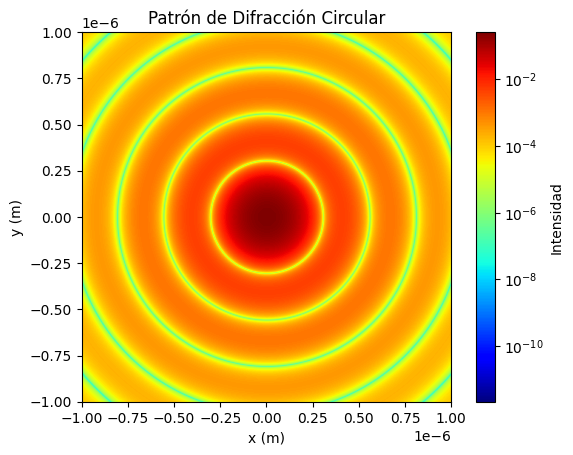

In [ ]:
def J(m, x):
    def integrand(theta):
        return np.cos(m * theta - x * np.sin(theta))

    N = 1000
    a = 0
    b = np.pi
    h = (b - a) / N
    integral = integrand(a) + integrand(b)

    for i in range(1, N, 2):
        integral += 4 * integrand(a + i * h)
    for i in range(2, N-1, 2):
        integral += 2 * integrand(a + i * h)

    return (1/np.pi) * (h/3) * integral


lambda_= 500e-9 #longitud de onda en m


k = 2 * np.pi / lambda_#calculando el número de onda

# Definir el rango de r
r_max = 1e-6  # 1 µm en metros
num_pun = 500
x = np.linspace(-r_max, r_max, num_pun)
y = np.linspace(-r_max, r_max, num_pun)
X, Y = np.meshgrid(x, y)


R = np.sqrt(X**2 + Y**2)
I = (J(1, k * R) / (k * R))**2# utilizando la ecuación I(r) que nos dan en el enunciado inicial, esto para calcular la intensidad de la luz

plt.imshow(I, extent=(-r_max, r_max, -r_max, r_max), cmap='jet', norm=LogNorm())
plt.colorbar(label='Intensidad')
plt.title('Patrón de Difracción Circular')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


**2. Error de estimación**

Escribe un programa, o modifica alguno de los que hicimos en clase, para calcular el valor de la integral $\int_0^2\left(x^4-2 x+1\right) \mathrm{d} x$, usando el regla trapezoidal con cortes de 20 , pero esta vez haz que el programa también imprima una estimación del error en el resultado, calculado usando la ecuación:
$$
\varepsilon=\frac{1}{3}\left(I_2-I_1\right)
$$
donde $\epsilon$ es el error e $I_1$ e $I_2$ son estimaciones usando con $N_1$ y $N_2$ pasos respectivamente. Por lo que necesitarás evaluar la integral dos veces, una con $N_1=10$ "rebanadas" y luego otra vez con $\mathrm{N}_2=20$ "rebanadas".

(a) ¿Como se compara el error calculado de esta manera con un cálculo directo del error como la diferencia entre su valor para la integral y el valor verdadero de 4.4? ¿Por qué los dos no concuerdan perfectamente?

In [ ]:
def trap(f,a,b,n):

    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))


def fun(x):#f(x)
    return x**4 - 2*x + 1


I1 = trap(fun, 0, 2, 10)#rebanadas de la integral
I2 = trap(fun, 0, 2, 20)

e= (1/3) * (I2 - I1)# error


print("Estimación con 10 rebanadas:", I1)
print("Estimación con 20 rebanadas:", I2)
print("Error estimado:", e)
print("Error directo:", abs(4.4 - I2))



Estimación con 10 rebanadas: 4.50656
Estimación con 20 rebanadas: 4.426660000000001
Error estimado: -0.026633333333333137
Error directo: 0.026660000000000572


La diferencia entre el error calculado de esta manera y el cálculo directo del error puede deberse a la naturaleza no lineal de la función. La regla trapezoidal es una aproximación que tiende a ser más precisa a medida que aumenta el número de "rebanadas". Sin embargo, la fórmula del error ϵ es solo una estimación y puede no ser exactamente precisa, especialmente si la función tiene curvatura significativa.

(b) Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla trapezoidal.

In [ ]:
x = np.linspace(0, 2, 1000)
y = fun(x)
I_scipy = trapz(y, x)
print("Resultado con scipy:", I_scipy)

Resultado con scipy: 4.400010688030972


 Los resultados obtenidos mediante el método directo implementado y mediante la biblioteca scipy deberían ser bastante cercanos. La función 'trapz' de scipy también implementa la regla trapezoidal, pero puede tener implementaciones adicionales para manejar la precisión numérica. Por lo tanto, puede haber ligeras diferencias entre los resultados obtenidos por ambos métodos, pero en general, deberían ser bastante cercanos.

**3.**

La teoría de sólidos de Debye dice que la capacidad calorífica de un sólido a una temperatura $T$ esta dada por:

$$
C_{V}=9 V \rho k_{B}\left(\frac{T}{\theta_{D}}\right)^{3} \int_{0}^{\theta_{D} / T} \frac{x^{4} \mathrm{e}^{x}}{\left(\mathrm{e}^{x}-1\right)^{2}} \mathrm{~d} x
$$

donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_{B}$ es la constante de Boltzmann y $\theta_{D}$ es la llamada temperatura de Debye, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

(a) Escribe una función $\mathrm{Cv}(\mathrm{T})$ que calcule la $C_{V}$ para un valor dado de temperatura, de una muestra que consta de 1000 centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho=6.022 \times 10^{28} \mathrm{~m}^{-3}$ y una temperatura de Debye de $\theta_{D}=$ $428 \mathrm{~K}$. Utiliza la cuadratura gaussiana para evaluar la integral, con $N=50$ puntos muestra.

In [ ]:
V = 1000 * 10**-6#
rho = 6.022 * 10**28#constantes
kB = 1.380649 * 10**-23#
theta_D = 428#

def f(x):
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2 #función a integrar

def Cv(T):
    integral, _ = fixed_quad(f, 0, theta_D/T, n=50)
    return 9 * V * rho * kB * (T/theta_D)**3 * integral #función Cv

T = 300#aqui damos el valor que queramos
print(f"Cv para T={T} K es: {Cv(T)} J/K")


Cv para T=300 K es: 2257.797304945587 J/K


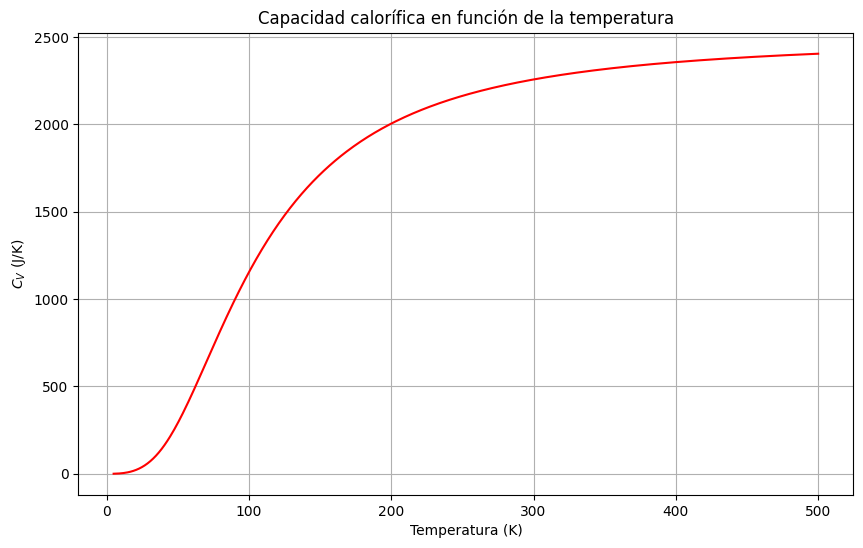

In [ ]:
valores_T = np.linspace(5, 500, 500)# T de 5K hasta 500K
Cv_va = []  #lista vacía de los valores de Cv
for T in valores_T:  #pasa por los valores establecidos de T
    cv = Cv(T)  #calcular el valor de Cv ara cada T
    Cv_va.append(cv)  #agregra los valores anteriores a la lista creada

plt.figure(figsize=(10,6))
plt.plot(valores_T, Cv_va, '-r', label='Capacidad calorífica $C_{V}$')
plt.title('Capacidad calorífica en función de la temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('$C_{V}$ (J/K)')
plt.grid(True)
plt.show()


**4**

En unidades donde todas las constantes son 1, la función de onda del nésimo nivel de energía del oscilador armónico cuántico unidimensional, (i.e., una partícula puntual sin espín en un pozo de potencial cuadrático) está dada por:

$$
\psi_{n}(x)=\frac{1}{\sqrt{2^{n} n ! \sqrt{\pi}}} \mathrm{e}^{-x^{2} / 2} H_{n}(x),
$$

para $n=0 \ldots \infty$, donde $H_{n}(x)$ es el nésimo polinomio de Hermite. Los polinomios de Hermite satisfacen una relación algo similar a la de los números de Fibonacci, aunque más compleja:

$$
H_{n+1}(x)=2 x H_{n}(x)-2 n H_{n-1}(x) .
$$

Los dos primeros polinomios de Hermite son $H_{0}(x)=1$ y $H_{1}(x)=2 x$.

(a) Escribe una función $\mathrm{H}(\mathrm{n}, \mathrm{x})$ que calcule $H_{n}(x)$ dados $x$ y cualquier número entero $n \geq 0$. Utiliza tu función para hacer una gráfica que muestre las funciones de onda del oscilador armónico para $n=0,1,2$ y 3, todos en el mismo gráfico, en el rango de $x=-4$ a $x=4$.Hint: Hay una función factorial en el paquete math que calcula el factorial de un número entero.

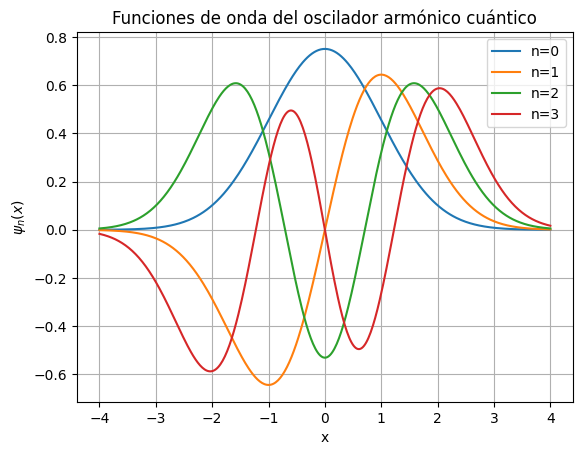

In [ ]:
def H(n, x):#definimos H
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*H(n-1, x) - 2*(n-1)*H(n-2, x)

def psi(n, x):#definimos psi
    coeficiente = 1 / math.sqrt(2**n * math.factorial(n) * math.sqrt(math.pi))
    hermite = H(n, x)
    return coeficiente * math.exp(-x**2 / 2) * hermite

x_val = np.linspace(-4, 4, 400)#rango de valores de x

for n in range(4):


    y_val = []    #guardar los valores de la función psi(n, x)

    for x in x_val:
        y_va = psi(n, x)
        y_val.append(y_va)
    plt.plot(x_val, y_val, label=f"n={n}")

plt.title("Funciones de onda del oscilador armónico cuántico")
plt.xlabel("x")
plt.ylabel("$\psi_n(x)$")
plt.legend()
plt.grid(True)
plt.show()


(b) Haz una gráfica aparte, de la función de onda para $n=30$ desde $x=-10$ hasta $x=10$.

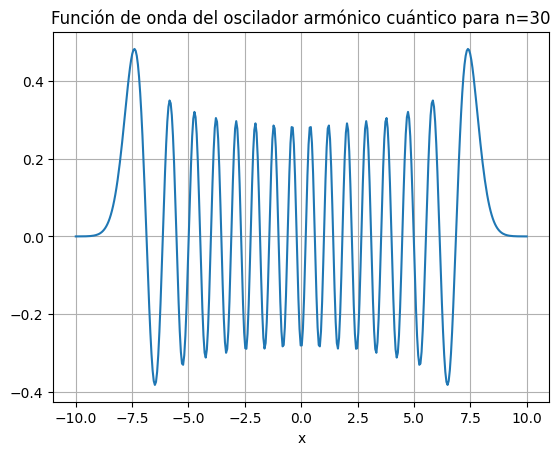

In [ ]:
def H(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        h0 = 1# Establece valores iniciales para los polinomios de Hermite de grado 0 y 1.
        h1 = 2 * x#

        for i in range(2, n + 1):
            # Usa la relación de recurrencia para calcular el polinomio de Hermite de grado i.
            hi = 2 * x * h1 - 2 * (i - 1) * h0

            h0 = h1 #actualiza los valores de h0 y h1 para la siguiente iteración.
            h1 = hi#
        return h1 #devuelve el polinomio de Hermite de grado n.

def psi(n, x):#definimos psi
    coeficiente = 1 / math.sqrt(2**n * math.factorial(n) * math.sqrt(math.pi))
    hermite = H(n, x)
    return coeficiente * math.exp(-x**2 / 2) * hermite


x_vals = np.linspace(-10, 10, 400)

n = 30
y_vals = []

for x in x_vals:
    y_valo = psi(n, x)
    y_vals.append(y_valo)


plt.plot(x_vals, y_vals, label=f"n={n}")
plt.title("Función de onda del oscilador armónico cuántico para n=30")
plt.xlabel("x")
plt.grid(True)
plt.show()


c) La incertidumbre cuántica de una partícula en el nésimo nivel de un oscilador armónico cuántico se puede cuantificar mediante su media cuadrática $\sqrt{\left\langle x^{2}\right\rangle}$, donde:

$$
\left\langle x^{2}\right\rangle=\int_{-\infty}^{\infty} x^{2}\left|\psi_{n}(x)\right|^{2} \mathrm{~d} x .
$$

Escribe un programa que evalúe esta integral usando la cuadratura gaussiana en 100 puntos y luego calcula la incertidumbre (es decir, la posición media cuadrática de la partícula) para un valor dado de $n$. Utiliza tu programa para calcular la incertidumbre para $n=5$.

In [ ]:
def integrand(x, n):
    return x**2 * abs(psi(n, x))**2

n = 5

integral, error = quad(integrand, -np.inf, np.inf, args=(n))

incertidumbre = np.sqrt(integral)

print("La incertidumbre para n=5 es:", incertidumbre)

La incertidumbre para n=5 es: 2.345207879911715


**5**

Una lámina de metal cuadrada uniforme flota inmóvil en el espacio:

![Alt text](image-2.png)

La lámina mide $10 \mathrm{~m}$ de lado, tiene un espesor insignificante y una masa de 10 toneladas.

(a) Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1 \mathrm{~kg}$ a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es

$$
F_{z}=G \sigma z \iint_{-L / 2}^{L / 2} \frac{\mathrm{d} x \mathrm{~d} y}{\left(x^{2}+y^{2}+z^{2}\right)^{3 / 2}}
$$

donde $G=6.674 \times 10^{-11} \mathrm{~m}^{3} \mathrm{~kg}^{-1} \mathrm{~s}^{-2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja.



**6- Diferenciación numérica**

Crea una funcion por el usuario $f(x)$ que devuelva el valor $1 + \frac{1}{2}\tanh 2x$, luego usa una diferencia central para calcular la derivada de la funcion en el rango ́$−2 ≤ x ≤ 2$. Calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: usa la función 'tanh' del paquete math.)

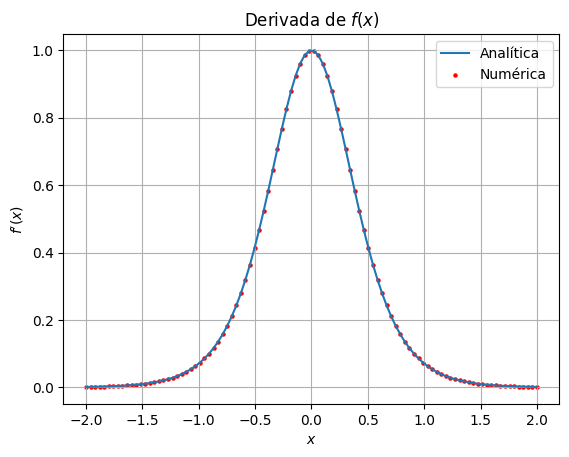

In [ ]:
def f(x):
    return 1 + 0.5 * math.tanh(2*x) # f(x)

def derivada_a(x):#f'(x)
    return (1 - np.tanh(2*x)**2)

def derivada_n(x, h=0.01):#derivada con diferencia central
    return (f(x+h) - f(x-h)) / (2*h)

x_val = np.linspace(-2, 2, 100)

valor_analitico = []
valor_numerico = []

for x in x_val:
    a_val = derivada_a(x)
    n_val = derivada_n(x)

    valor_analitico.append(a_val)
    valor_numerico.append(n_val)



plt.plot(x_val, valor_analitico, label="Analítica")
plt.scatter(x_val, valor_numerico, label="Numérica", color="red", s=5)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f^{\prime}(x)$")
plt.title("Derivada de $f(x)$")
plt.grid(True)
plt.show()
